In [2]:
import pandas as pd
import seaborn as sns
import da
from IPython.display import display
df = pd.read_csv("train.csv")

The first 5 rows of data in the trains.csv file

In [3]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Distribution of Age of people on the Titanic

<Axes: xlabel='Age', ylabel='Count'>

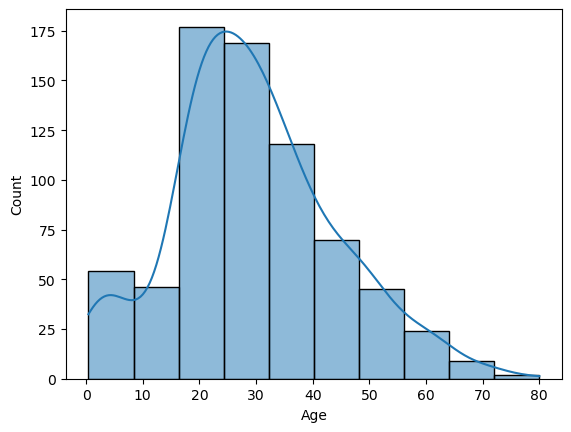

In [4]:
age = df["Age"]
sns.histplot(x=age,bins=10,kde=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


<Axes: xlabel='Age', ylabel='Survival_Rate'>

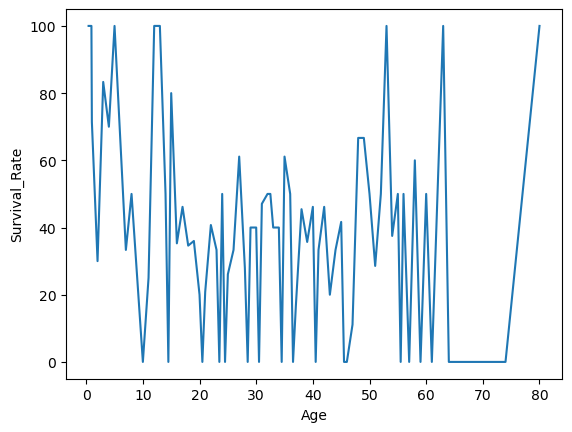

In [ ]:
age_survival_rate = df.groupby("Age",as_index=True)[["Survived"]].mean()
display(age_survival_rate)
age_survival_rate["Survived"]= age_survival_rate["Survived"]* 100
age_survival_rate.rename({"Survived":"Survival_Rate"},axis="columns",inplace=True)
sns.lineplot(data=age_survival_rate,y="Survival_Rate",x="Age")